In [51]:
library("dplyr")
library("glmnet")
library("car")
library("ggplot2")

OLS:

$$RSS \to \min_{\hat\beta}$$

LASSO:

$$RSS + \lambda \sum |\hat\beta_j| \to \min_{\hat\beta}$$

Ridge regression (гребневая регрессия):

$$RSS + \lambda \sum \hat\beta_j^2 \to \min_{\hat\beta}$$

In [52]:
head(cars)

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


Искусственно добавим квадрат и куб скорости :)

In [53]:
cars2 <- mutate(cars, speed2 = speed^2, 
                speed3 = speed^3)

In [54]:
head(cars2)

,speed,dist,speed2,speed3
1,4,2,16,64
2,4,10,16,64
3,7,4,49,343
4,7,22,49,343
5,8,16,64,512
6,9,10,81,729


In [55]:
model_0 <- lm(data = cars2, 
              dist ~ speed + speed2 + speed3)

In [56]:
summary(model_0)


Call:
lm(formula = dist ~ speed + speed2 + speed3, data = cars2)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.670  -9.601  -2.231   7.075  44.691 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -19.50505   28.40530  -0.687    0.496
speed         6.80111    6.80113   1.000    0.323
speed2       -0.34966    0.49988  -0.699    0.488
speed3        0.01025    0.01130   0.907    0.369

Residual standard error: 15.2 on 46 degrees of freedom
Multiple R-squared:  0.6732,	Adjusted R-squared:  0.6519 
F-statistic: 31.58 on 3 and 46 DF,  p-value: 3.074e-11


In [57]:
X <- model.matrix(data = cars2,
                 ~ speed + speed2 + speed3)
head(X)

,(Intercept),speed,speed2,speed3
1,1,4,16,64
2,1,4,16,64
3,1,7,49,343
4,1,7,49,343
5,1,8,64,512
6,1,9,81,729


Собственные числа матрицы $X'X$:

In [58]:
XX <- crossprod(X) # X'X # t(X) %*% X
lambda <- eigen(XX)$values
lambda

[1] 2.080900e+09 1.586193e+05 7.315488e+01 2.719130e-01

In [59]:
CI <- sqrt(max(lambda) / min(lambda))

Индекс обусловленности матрицы, $CI = \sqrt{\lambda_{max}/\lambda_{min}}$, равен

In [60]:
CI

[1] 87480.38

Корреляционная матрица:

In [61]:
cor(cars2)

,speed,dist,speed2,speed3
speed,1.0000000,0.8068949,0.9794765,0.9389237
dist,0.8068949,1.0000000,0.8160295,0.8045771
speed2,0.9794765,0.8160295,1.0000000,0.9884061
speed3,0.9389237,0.8045771,0.9884061,1.0000000


Коэффициенты вздутия дисперсии, VIF (variance inflation factors)

$$VIF_x = \frac{1}{1-R^2_x}$$

Участвует в оценке дисперсии коэффициента:

$$\widehat{Var}(\hat\beta_x)=VIF_x \cdot \frac{\hat\sigma^2}{\sum (x_i - \bar x)^2}$$

In [62]:
vif(model_0)

speed    speed2    speed3 
 274.1131 1408.0884  483.0570

In [63]:
y <- cars$dist
lasso <- glmnet(X, y)
lasso


Call:  glmnet(x = X, y = y) 

      Df   %Dev  Lambda
 [1,]  0 0.0000 20.8200
 [2,]  1 0.1131 18.9700
 [3,]  1 0.2069 17.2800
 [4,]  1 0.2848 15.7500
 [5,]  1 0.3495 14.3500
 [6,]  1 0.4033 13.0700
 [7,]  1 0.4479 11.9100
 [8,]  1 0.4849 10.8500
 [9,]  1 0.5156  9.8900
[10,]  2 0.5414  9.0110
[11,]  2 0.5628  8.2110
[12,]  2 0.5805  7.4810
[13,]  2 0.5953  6.8170
[14,]  2 0.6075  6.2110
[15,]  2 0.6177  5.6590
[16,]  2 0.6261  5.1570
[17,]  2 0.6331  4.6980
[18,]  2 0.6389  4.2810
[19,]  2 0.6437  3.9010
[20,]  3 0.6478  3.5540
[21,]  3 0.6511  3.2380
[22,]  3 0.6539  2.9510
[23,]  3 0.6571  2.6890
[24,]  3 0.6597  2.4500
[25,]  2 0.6618  2.2320
[26,]  2 0.6632  2.0340
[27,]  2 0.6643  1.8530
[28,]  2 0.6652  1.6890
[29,]  2 0.6660  1.5390
[30,]  2 0.6666  1.4020
[31,]  2 0.6671  1.2770
[32,]  2 0.6676  1.1640
[33,]  2 0.6679  1.0600
[34,]  2 0.6682  0.9662
[35,]  2 0.6685  0.8804
[36,]  2 0.6687  0.8022
[37,]  2 0.6689  0.7309
[38,]  2 0.6690  0.6660
[39,]  2 0.6691  0.6068
[40,]  2 

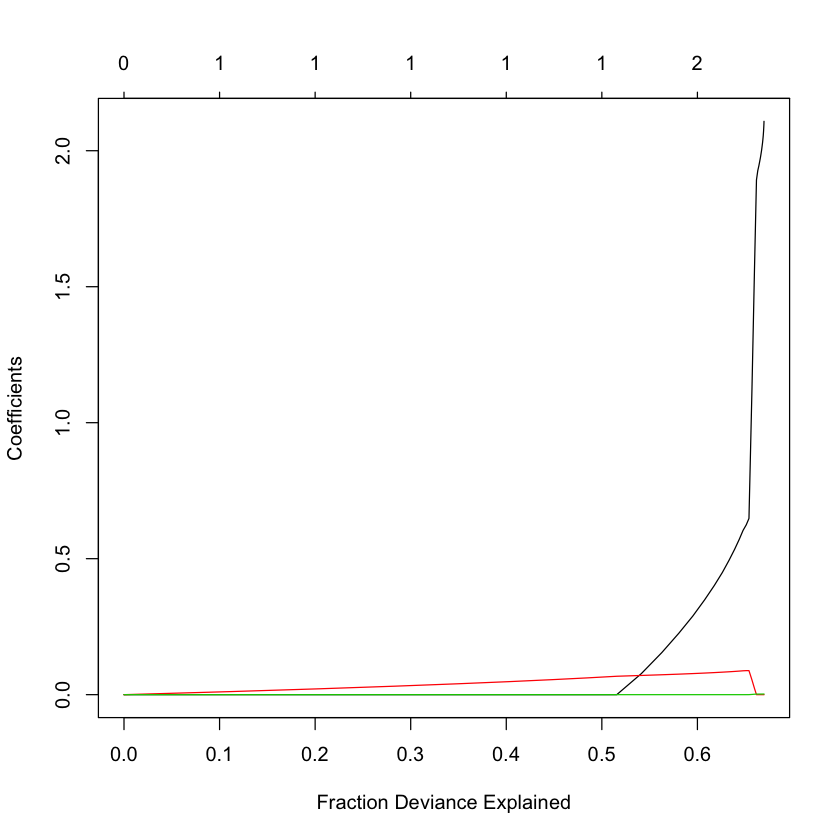

In [64]:
plot(lasso, xvar = "dev")

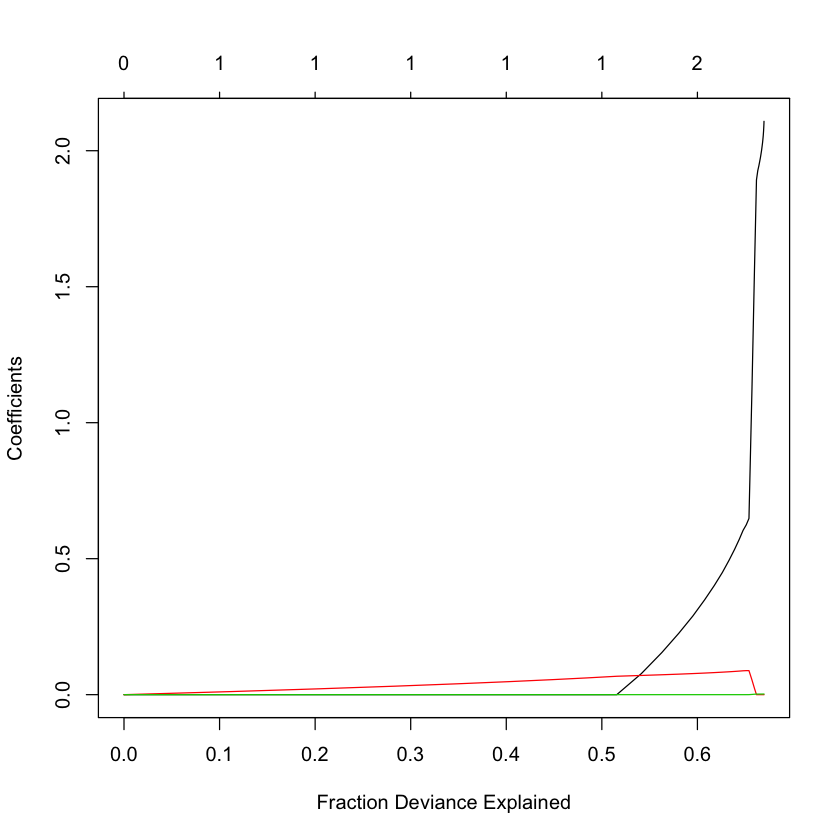

In [65]:
plot(lasso, xvar = "dev")

Оценки для конкретных $\lambda$:

In [66]:
coef(lasso, s = c(0.1, 1))

5 x 2 sparse Matrix of class "dgCMatrix"
                       1           2
(Intercept) -1.234666439 0.542544545
(Intercept)  .           .          
speed        2.108053662 2.028612210
speed2       .           .          
speed3       0.002397209 0.002284228

Построим прогнозы для скорости 10 (квадрат скорости - 100, куб - 1000)

In [67]:
m <- matrix(c(1, 10, 100, 1000), nrow = 1)
predict(lasso, newx = m, s = c(0.1, 1))

1,2
22.24308,23.11289


Подберём наилучшее $\lambda$ с помощью кросс-валидации:

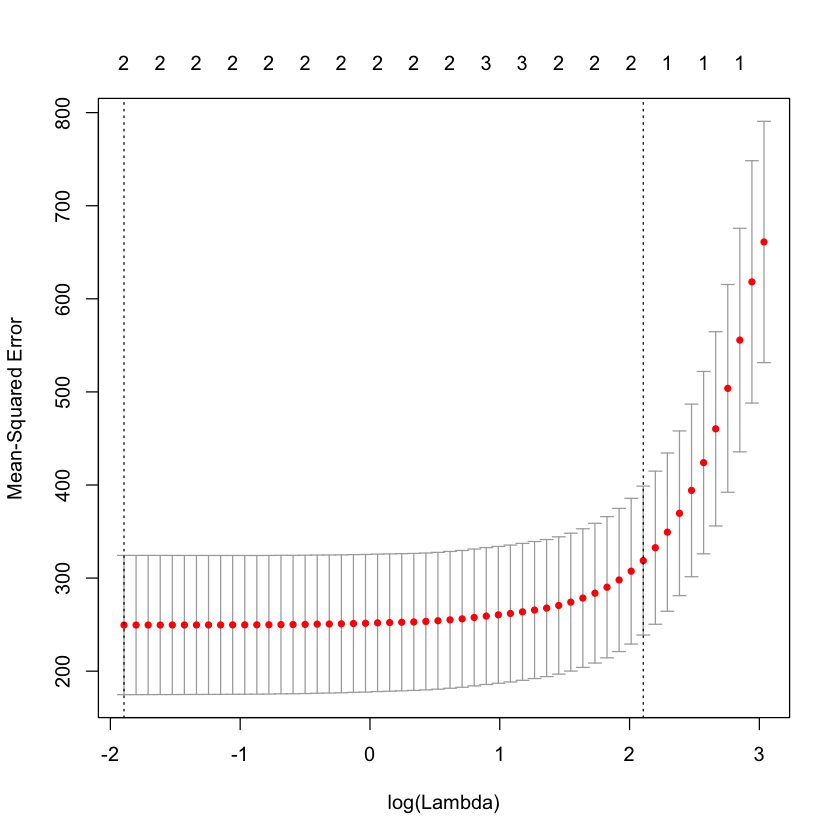

In [68]:
cv_lasso <- cv.glmnet(X, y)
plot(cv_lasso)

Вертикальными пунктирами на графике - две оценки $\hat \lambda$: 

* Слева $\hat\lambda_{min}$ - минимизирующая $RSS_{CV}$
* Справа $\hat\lambda_{1se}$ - более консервативная

In [69]:
cv_lasso$lambda.min
cv_lasso$lambda.1se

[1] 0.1503172

[1] 8.210742

Коэффициенты для $\hat\lambda_{min}$:

In [70]:
coef(cv_lasso, s = "lambda.min")

5 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) -1.209873240
(Intercept)  .          
speed        2.107105109
speed2       .          
speed3       0.002395131

Прогнозы для $\hat\lambda_{min}$:

In [71]:
predict(cv_lasso, newx = m, s = "lambda.min")

1
22.25631


Ridge оценивается полностью аналогично, только с опцией `alpha = 0`:

In [72]:
ridge <- glmnet(X, y, alpha = 0)
ridge


Call:  glmnet(x = X, y = y, alpha = 0) 

       Df      %Dev    Lambda
  [1,]  3 3.968e-36 20820.000
  [2,]  3 5.253e-03 18970.000
  [3,]  3 5.761e-03 17280.000
  [4,]  3 6.319e-03 15750.000
  [5,]  3 6.930e-03 14350.000
  [6,]  3 7.600e-03 13070.000
  [7,]  3 8.334e-03 11910.000
  [8,]  3 9.139e-03 10850.000
  [9,]  3 1.002e-02  9890.000
 [10,]  3 1.098e-02  9011.000
 [11,]  3 1.204e-02  8211.000
 [12,]  3 1.320e-02  7481.000
 [13,]  3 1.446e-02  6817.000
 [14,]  3 1.585e-02  6211.000
 [15,]  3 1.736e-02  5659.000
 [16,]  3 1.902e-02  5157.000
 [17,]  3 2.083e-02  4698.000
 [18,]  3 2.281e-02  4281.000
 [19,]  3 2.497e-02  3901.000
 [20,]  3 2.733e-02  3554.000
 [21,]  3 2.990e-02  3238.000
 [22,]  3 3.271e-02  2951.000
 [23,]  3 3.577e-02  2689.000
 [24,]  3 3.911e-02  2450.000
 [25,]  3 4.273e-02  2232.000
 [26,]  3 4.668e-02  2034.000
 [27,]  3 5.097e-02  1853.000
 [28,]  3 5.562e-02  1689.000
 [29,]  3 6.067e-02  1539.000
 [30,]  3 6.614e-02  1402.000
 [31,]  3 7.206e-02  1277.00